   time  cells
0   0.0    205
1   0.5    225
2   1.0    238
3   1.5    240
4   2.0    248


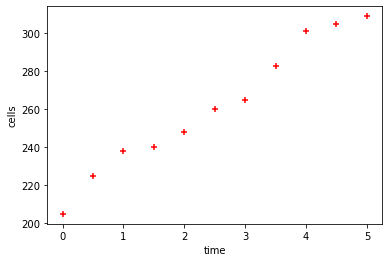

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

df = pd.read_csv("other files/cells.csv")

print(df.head())

plt.figure()
plt.xlabel('time')
plt.ylabel('cells')
plt.scatter(df['time'],df['cells'],color = 'red',marker='+')

In [3]:
# x independant (time)
# y dependant - predict Y

x_df = df.drop('cells', axis='columns')
y_df = df.cells

reg = linear_model.LinearRegression() # create an instance of the model
reg.fit(x_df, y_df) # train the model

print("Model score...", reg.score(x_df,y_df))
print("Predicted # cells...", reg.predict([[2.3]]))

Model score... 0.9784252641866715
Predicted # cells... [257.61090909]


In [4]:
# Y = mx + c
c = reg.intercept_
m = reg.coef_

print("From manual calculation, cells = ", (m*2.3+c))

From manual calculation, cells =  [257.61090909]


In [6]:
cells_predict_df = pd.read_csv("other files/cells_predict.csv")
print(cells_predict_df.head())

predicted_cells = reg.predict(cells_predict_df)
print(predicted_cells)

   time
0   0.1
1   0.2
2   0.3
3   0.4
4   0.5
[212.33090909 214.38909091 216.44727273 218.50545455 220.56363636
 222.62181818 224.68       226.73818182 228.79636364 230.85454545
 232.91272727 234.97090909 237.02909091 239.08727273 241.14545455
 243.20363636 245.26181818 247.32       249.37818182 251.43636364
 253.49454545 255.55272727 257.61090909 259.66909091 261.72727273
 263.78545455 265.84363636 267.90181818 269.96       272.01818182
 274.07636364 276.13454545 278.19272727 280.25090909 282.30909091
 284.36727273 286.42545455 288.48363636 290.54181818 292.6       ]


In [7]:
cells_predict_df['cells'] = predicted_cells
print(cells_predict_df.head())

   time       cells
0   0.1  212.330909
1   0.2  214.389091
2   0.3  216.447273
3   0.4  218.505455
4   0.5  220.563636


In [8]:
cells_predict_df.to_csv("other files/predicted_cells.csv")

In [11]:
## Splitting data into training and testing sets for machine learning

# x independant (time)
# y dependant - predict Y

x_df = df.drop('cells', axis='columns')
y_df = df.cells

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.4, random_state=10)

reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

prediction_test = reg.predict(X_test)
print(y_test, prediction_test)
print("Mean sq. error between y_test and predicted = ", np.mean(prediction_test-y_test)**2)

2    238
6    265
8    301
5    260
7    283
Name: cells, dtype: int64 [229.66081871 270.73684211 291.2748538  260.46783626 281.00584795]
Mean sq. error between y_test and predicted =  7.677112273861912


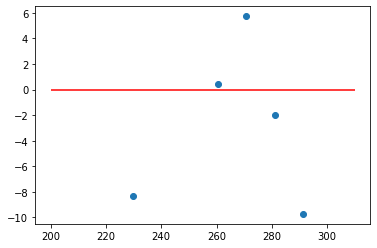

In [13]:
# Residual plot
plt.figure()
plt.scatter(prediction_test, prediction_test-y_test)
plt.hlines(y = 0, xmin=200, xmax=310, colors="red")